# Import library

In [2]:
from sklearn.naive_bayes import GaussianNB
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns

# Load data

In [9]:
iris = sns.load_dataset("iris")
iris = iris.rename(index = str, columns = {'sepal_length':'1_sepal_length','sepal_width':'2_sepal_width', 'petal_length':'3_petal_length', 'petal_width':'4_petal_width'})
df1 = iris[["1_sepal_length", "2_sepal_width",'species']]

x_data = df1.iloc[:, 0:2]
y_labels = df1.iloc[:,2].replace({'setosa':0,'versicolor':1,'virginica':2}).copy()

print("x data:\n",x_data)
print("\ny label:\n",y_labels)

x data:
      1_sepal_length  2_sepal_width
0               5.1            3.5
1               4.9            3.0
2               4.7            3.2
3               4.6            3.1
4               5.0            3.6
..              ...            ...
145             6.7            3.0
146             6.3            2.5
147             6.5            3.0
148             6.2            3.4
149             5.9            3.0

[150 rows x 2 columns]

y label:
 0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64


# Fit model

In [4]:
model_sk = GaussianNB(priors=None)
model_sk.fit(x_data.values, y_labels)

GaussianNB()

# description model

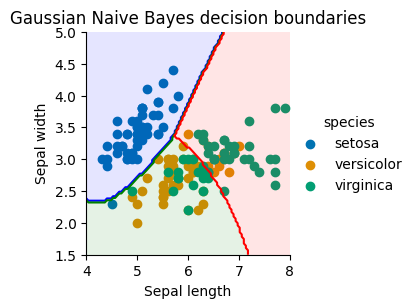

In [5]:
N = 100
X = np.linspace(4,8,N)
Y = np.linspace(1.5,5,N)
X, Y = np.meshgrid(X,Y)

color_list = ['Blues', 'Greens', 'Reds']
my_norm = colors.Normalize(vmin=-1., vmax=1.)

g = sns.FacetGrid(iris, hue="species", palette= 'colorblind') .map(plt.scatter, "1_sepal_length", "2_sepal_width",) . add_legend()
my_ax = g.ax

zz = np.array( [model_sk.predict( [[xx,yy]])[0] for xx, yy in zip(np.ravel(X), np.ravel(Y) )])

Z = zz.reshape(X.shape)

my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))

my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('Gaussian Naive Bayes decision boundaries')
plt.show()